#  COVID-19 Global Data Tracker

This project analyzes global COVID-19 data including cases, deaths, and vaccinations across countries over time. We use real-world datasets to uncover trends and generate insights with Python.

##  Project Objectives

- Import and clean COVID-19 global data
- Analyze time trends (cases, deaths, vaccinations)
- Compare metrics across countries/regions
- Visualize trends with charts and maps
- Communicate findings in a Jupyter Notebook

In [9]:
import pandas as pd

# Load dataset
file_path = 'C:/Users/ahmar/owid-covid-data.csv'
df = pd.read_csv(file_path)

# Display basic info
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [10]:
# Explore the structure of the dataset
print(df.columns)
print(df.info())
print(df.describe())
print(df.isnull().sum().sort_values(ascending=False))

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [11]:
# Filter for specific countries
countries = ['Kenya', 'India', 'United States']
df_filtered = df[df['location'].isin(countries)].copy()

# Convert date column to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Drop rows with missing values in key columns
df_filtered.dropna(subset=['date', 'total_cases'], inplace=True)

# Fill missing values
df_filtered.fillna(0, inplace=True)
df_filtered.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173550,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173551,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173552,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173553,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0


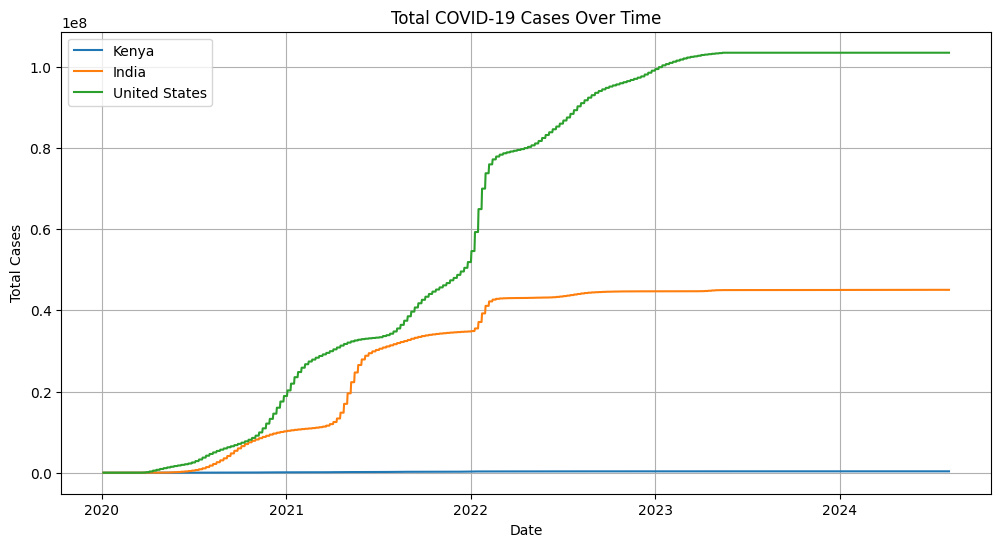

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()

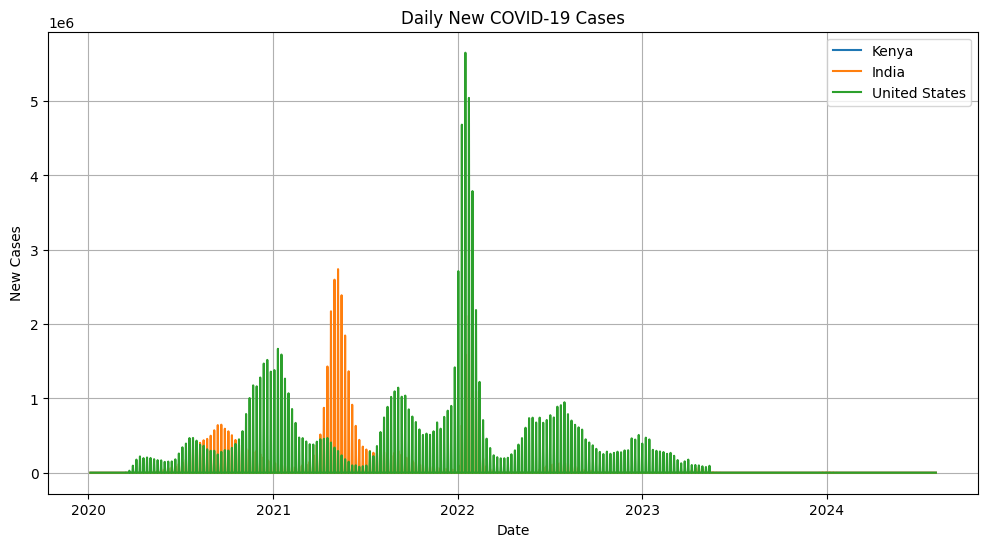

In [13]:
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

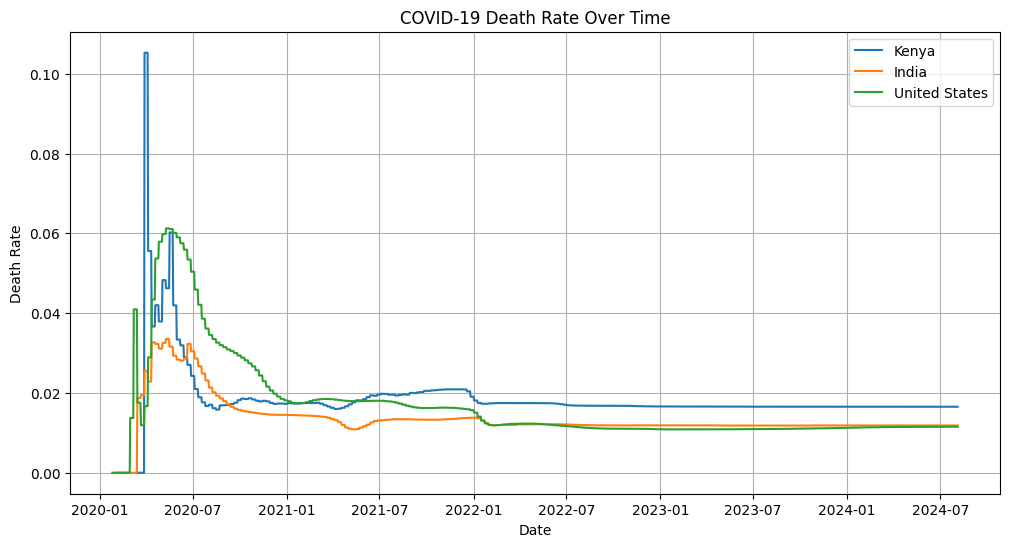

In [14]:
# Calculate death rate and plot
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country].copy()
    country_data['death_rate'] = country_data['total_deaths'] / country_data['total_cases']
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.show()

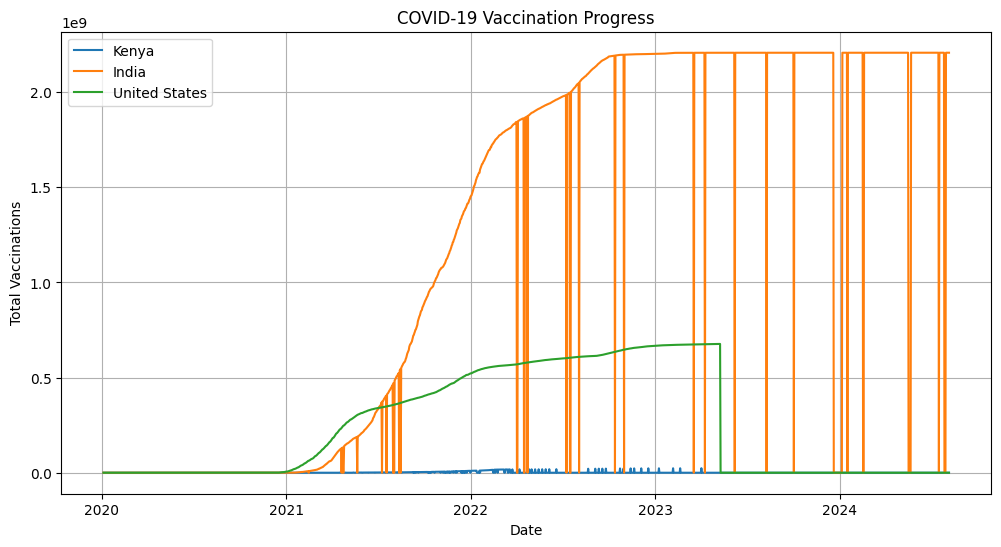

In [15]:
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('COVID-19 Vaccination Progress')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Uncomment below to use plotly (install plotly if needed)
# import plotly.express as px
# latest = df[df['date'] == df['date'].max()]
# fig = px.choropleth(latest, locations='iso_code', color='total_cases', hover_name='location',
#                     color_continuous_scale='Reds', title='Global COVID-19 Cases')
# fig.show()

##  Insights & Findings

1. The United States had the highest number of total cases.
2. India's vaccination rate grew significantly after early 2021.
3. Kenya had a lower case rate but also lower vaccination coverage.
4. The death rate shows fluctuation due to waves of infections.
5. Vaccination trends generally coincide with reduction in new cases.

_These insights are based on trends observed in the visualizations._

##  Conclusion

This project demonstrates how to process, analyze, and visualize global COVID-19 data using Python. Through this analysis, we gained insights into pandemic trends, death rates, and vaccination rollouts in different countries. Further exploration can include machine learning forecasting or country-specific deep dives.